# Value at Risk Assessment Model for Costco (COST)

### Import Packages


In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

### Distributions - Set Up Stock Parameters

In [10]:
# Number of shares
shares_COST = 1000

# Live stock price
price = yf.Ticker('COST')
price_COST = price.history().tail(1)['Close'].iloc[0]

print(price)
print('---------')
print(price_COST)

yfinance.Ticker object <COST>
---------
1062.5400390625


30-day Historical volatility source: https://www.alphaquery.com/stock/COST/volatility-option-statistics/30-day/historical-volatility

In [12]:
# Investment value
value_COST = price_COST * shares_COST

# Risk free rate (4 week treasury bill rate)
rfr_COST = 0.02 

# Volatility (30-day volatility at that time)
# Start Date: 2024-11-20 
# End Date: 2025-02-19

vol_COST = 0.1814

### Simulations - Calculate Investment Returns

In [13]:
# Number of simulations
simulations = 5000 

# Investment time in a year
t_COST = 21/252 

(array([  2.,   0.,   0.,   0.,   0.,   1.,   2.,   3.,   4.,   3.,   3.,
          7.,  12.,   9.,  15.,  14.,  11.,  17.,  17.,  20.,  28.,  38.,
         38.,  39.,  41.,  62.,  50.,  67.,  77.,  76.,  86., 106., 113.,
        108., 111., 119., 117., 149., 124., 124., 151., 171., 167., 159.,
        165., 136., 156., 152., 149., 142., 146., 146., 140., 133., 118.,
         81., 101.,  92.,  68.,  87.,  79.,  64.,  49.,  57.,  38.,  33.,
         32.,  26.,  27.,  29.,  20.,  13.,  12.,  12.,  11.,   5.,   3.,
          1.,   3.,   4.,   1.,   0.,   1.,   0.,   2.,   0.,   0.,   3.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-3.48126075, -3.40235414, -3.32344753, -3.24454092, -3.16563432,
        -3.08672771, -3.0078211 , -2.92891449, -2.85000789, -2.77110128,
        -2.69219467, -2.61328806, -2.53438146, -2.45547485, -2.37656824,
        -2.29766163, -2.21875502, -2.13984842, -2.06094181, -1.9820352 ,
        -1.90312859, -1.82

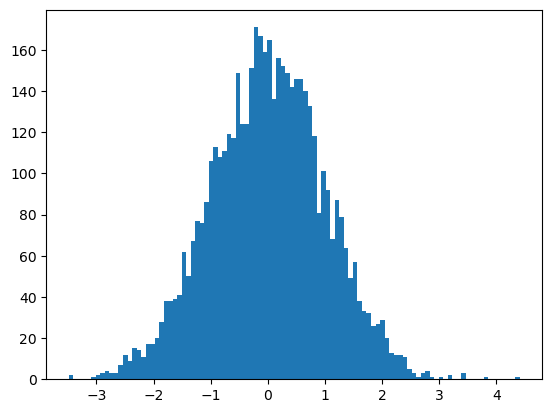

In [14]:
# Explain np.random.standard_normal
sample = np.random.standard_normal(5000)
plt.hist(sample,bins=100)

In [15]:
print(np.mean(sample))
print(np.std(sample))

0.004265672862389006
0.9959917704812389


In [20]:
# Create a function to calculate the returns of the investment
def VaR(pv, rfr, vol, t, simulations):
    end_value = pv * np.exp((rfr - .5 * vol ** 2) * t + np.random.standard_normal(
        simulations) * vol * np.sqrt(t))
    returns = end_value - pv
    return returns

# Apply the VaR function to simulate the returns
returns_COST = VaR(value_COST, rfr_COST, vol_COST, t_COST, simulations)

### Quantifications - Identify VaR at 90%, 95%, and 99% Confidence Level

In [21]:
# Explain string formatting
# Print: VaR at x% confidence level: $y.

x = 0.9
y = 3455.248
print("VaR at {:.0%} confidence level: ${:,.0f}".format(x, y))

VaR at 90% confidence level: $3,455


VaR at 90% confidence level: $-66,381
VaR at 95% confidence level: $-85,538
VaR at 99% confidence level: $-116,787


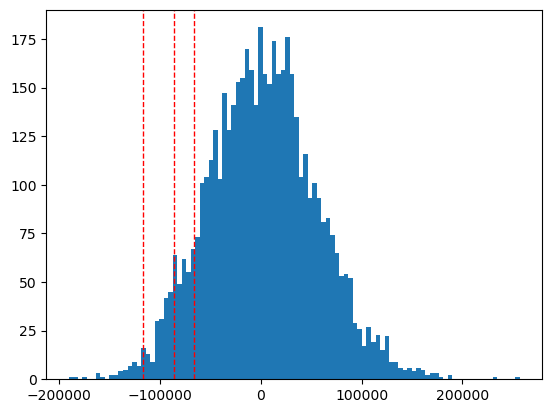

In [23]:
# Plot the returns
plt.hist(returns_COST, bins=100);

# Show VaR at 90%, 95%, and 99% confidence level
percentiles = [10,5,1]

for i in percentiles:
    confidence = (100-i)/100
    value = np.percentile(returns_COST, i)
    print("VaR at {:.0%} confidence level: ${:,.0f}".format(confidence, value))
    plt.axvline(value, color = 'red', linestyle='dashed', linewidth=1)